# Media Sentiment Analysis Using Twitter
## Analysis:
* 
* 
* 

In [1]:
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Tweepy Calls & Sentiment Analysis

In [2]:
target_user = ("@FoxNews", "@CNN", "@nytimes", "@BBCNews", "@CBSNews")

sentiments = []

for user in target_user:
    counter = 1
    for x in range(5):
        public_tweets = api.user_timeline(user, count = 20)
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            sentiments.append({"Username": user,
                               "Text": tweet["text"],
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets_Ago": counter})

            counter += 1

## Make Data Frame & Convert into CSV

In [3]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)
date = datetime.strptime(sentiments_pd["Date"][0],'%a %b %d %H:%M:%S +0000 %Y').strftime('%m/%d/%Y')
sentiments_pd.to_csv("Output/media_tweet_sentiments.csv", sep=',', encoding='utf-8', index = False)
sentiments_pd

,Compound,Date,Negative,Neutral,Positive,Text,Tweets_Ago,Username
0,0.0000,Wed Jun 06 17:49:26 +0000 2018,1.000,0.000,0.000,".@newtgingrich: ""It's a traffic jam [@TheDemoc...",1,@FoxNews
1,-0.8176,Wed Jun 06 17:45:15 +0000 2018,0.615,0.385,0.000,Woman pleads guilty to making up rape allegati...,2,@FoxNews
2,0.0000,Wed Jun 06 17:34:05 +0000 2018,1.000,0.000,0.000,Rainbow spotted in crater of Hawaii's Kilauea ...,3,@FoxNews
3,0.0772,Wed Jun 06 17:31:36 +0000 2018,0.920,0.000,0.080,Moments ago @KimKardashian tweeted out about P...,4,@FoxNews
4,0.2500,Wed Jun 06 17:29:38 +0000 2018,0.875,0.000,0.125,Ex-Dem IT aide Imran Awan poised for plea deal...,5,@FoxNews
5,0.0000,Wed Jun 06 17:16:20 +0000 2018,1.000,0.000,0.000,".@mattgaetz: ""Andrew McCabe was leaking to the...",6,@FoxNews
6,0.0000,Wed Jun 06 17:12:02 +0000 2018,1.000,0.000,0.000,"""They put everything on the line for us, and w...",7,@FoxNews
7,0.0000,Wed Jun 06 17:05:55 +0000 2018,1.000,0.000,0.000,House Democratic leaders hold a news conferenc...,8,@FoxNews
8,-0.5859,Wed Jun 06 17:05:00 +0000 2018,0.798,0.202,0.000,"""No one who defends our country in uniform sho...",9,@FoxNews
9,0.0000,Wed Jun 06 17:00:01 +0000 2018,1.000,0.000,0.000,".@newtgingrich: ""65% of Californians say that ...",10,@FoxNews


In [4]:
sentiments_pd.count()

Compound      500
Date          500
Negative      500
Neutral       500
Positive      500
Text          500
Tweets_Ago    500
Username      500
dtype: int64

In [5]:
avg_sentiments_df = sentiments_pd[["Username","Compound"]].groupby(["Username"])["Compound"].mean()
avg_sentiments_df = pd.DataFrame(avg_sentiments_df).reset_index()
avg_sentiments_df = avg_sentiments_df.rename(columns={ "Compound" : "Average Polarity"})
avg_sentiments_df

,Username,Average Polarity
0,@BBCNews,-0.103090
1,@CBSNews,-0.097330
2,@CNN,-0.025005
3,@FoxNews,-0.020180
4,@nytimes,-0.088605


## Scatter Plot
### Shows the tweet sentiments of the tweets from each news outlet

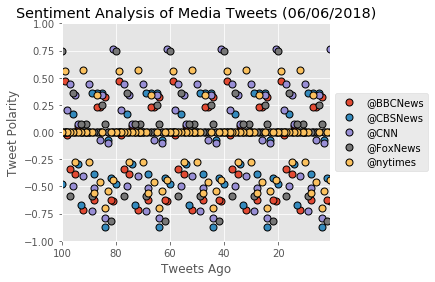

In [6]:
groups = sentiments_pd.groupby('Username')
fig, ax = plt.subplots()
ax.margins(0.05)
for name, group in groups:
    x = group.Tweets_Ago
    y = group.Compound
    ax.plot(x,y, marker='o',markeredgecolor="black", linestyle='', ms=7, label=name)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-10,110)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title(f"Sentiment Analysis of Media Tweets ({date})")
plt.ylim(-1,1)
plt.xlim([x.max(),x.min()])
plt.savefig("Output/Sentiment_Analysis.png")
plt.show()

## Bar Chart
### Highlights the overall tweet sentiments for various news outlets

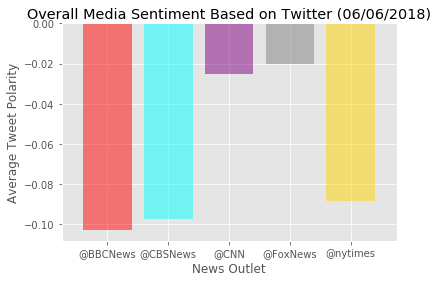

In [7]:
y_vals = avg_sentiments_df["Average Polarity"]
x_axis = np.arange(len(y_vals))
labels = avg_sentiments_df["Username"]
colors = ["red", "cyan", "purple", "grey", "gold"]
plt.bar(x_axis, y_vals, alpha=0.5, align="center", color = colors)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.title(f"Overall Media Sentiment Based on Twitter ({date})")
plt.xlabel("News Outlet")
plt.ylabel("Average Tweet Polarity")
plt.savefig("Output/Overall_Analysis.png")
plt.show()